Prediksi Persediaan Darah dengan Metode Monte Carlo:
Bulan
Februari     10.0
Agustus       9.8
Oktober       9.3
November      9.2
Desember      8.6
Juni          8.6
Mei           8.3
Juli          8.0
Maret         7.7
September     7.6
Januari       6.6
April         6.3
Name: proportion, dtype: float64


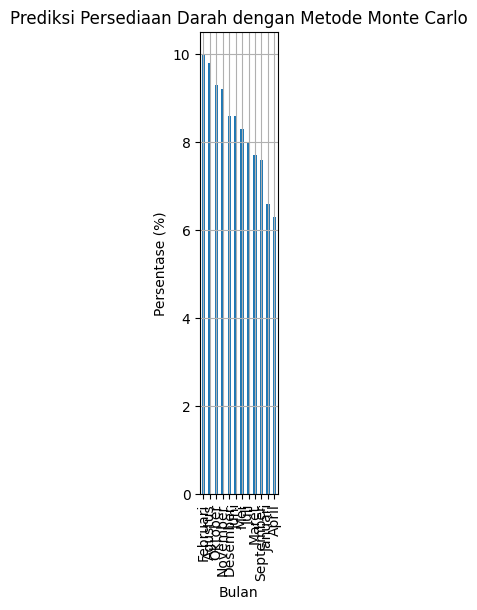

In [3]:
# Langkah 1: Import Library yang Dibutuhkan
import numpy as np
import pandas as pd
import random

# Langkah 2: Mengumpulkan dan Mengolah Data
# Data persediaan darah dari UTD PMI (contoh data)
data_persediaan = {
    'Bulan': ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],
    '2018': [6830, 8140, 7340, 6890, 7670, 7500, 7900, 8120, 7150, 7250, 7800, 7700],
    '2019': [7020, 8090, 7540, 6990, 7870, 7600, 8100, 8320, 7250, 7350, 8000, 7800]
}

df = pd.DataFrame(data_persediaan)

# Langkah 3: Menghitung Distribusi Probabilitas dan Distribusi Probabilitas Komulatif
df['Total'] = df['2018'] + df['2019']
total_all = df['Total'].sum()

df['Probabilitas'] = df['Total'] / total_all
df['Probabilitas_Komulatif'] = df['Probabilitas'].cumsum()

# Langkah 4: Menentukan Interval Bilangan Acak
intervals = []
for i in range(len(df)):
    if i == 0:
        intervals.append((0, df.loc[i, 'Probabilitas_Komulatif']))
    else:
        intervals.append((df.loc[i-1, 'Probabilitas_Komulatif'], df.loc[i, 'Probabilitas_Komulatif']))

df['Interval'] = intervals

# Langkah 5: Melakukan Simulasi Monte Carlo
def simulasi_monte_carlo(banyak_simulasi, df):
    hasil_simulasi = []
    for _ in range(banyak_simulasi):
        bilangan_acak = random.random()
        for index, row in df.iterrows():
            if row['Interval'][0] <= bilangan_acak < row['Interval'][1]:
                hasil_simulasi.append(row['Bulan'])
                break
    return hasil_simulasi

# Melakukan simulasi sebanyak 1000 kali
banyak_simulasi = 1000
hasil_simulasi = simulasi_monte_carlo(banyak_simulasi, df)

# Langkah 6: Menganalisis Hasil Simulasi
hasil_df = pd.DataFrame(hasil_simulasi, columns=['Bulan'])
prediksi_persediaan = hasil_df['Bulan'].value_counts(normalize=True) * 100

# Menampilkan Hasil
print("Prediksi Persediaan Darah dengan Metode Monte Carlo:")
print(prediksi_persediaan)

# Visualisasi hasil
import matplotlib.pyplot as plt

plt.figure(figsize=(1, 6))
prediksi_persediaan.plot(kind='bar')
plt.title('Prediksi Persediaan Darah dengan Metode Monte Carlo')
plt.xlabel('Bulan')
plt.ylabel('Persentase (%)')
plt.grid(True)
plt.show()
